In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#from google.colab import drive
#drive.mount('/content/drive')

# Conhecendo o Dataset

In [58]:
df = pd.read_csv('train.csv', index_col='id')

In [59]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [61]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


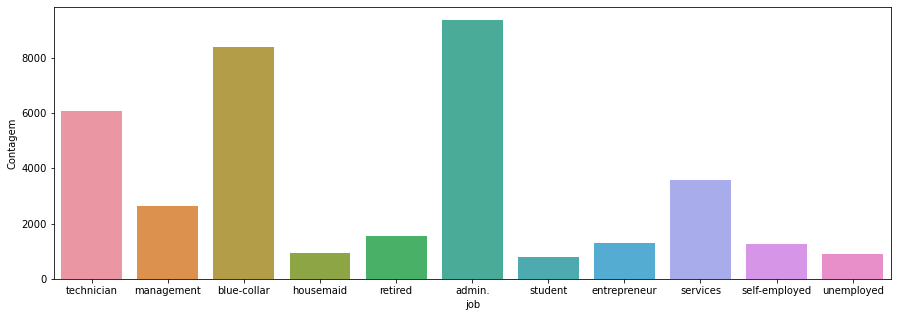

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job')
plt.ylabel('Contagem')
plt.show()

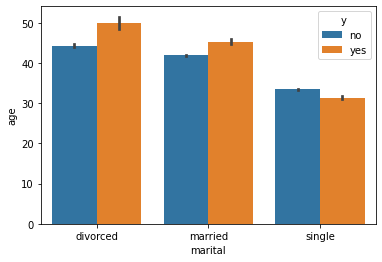

In [63]:
sns.barplot(data=df, x='marital', y='age', hue='y')
plt.show()

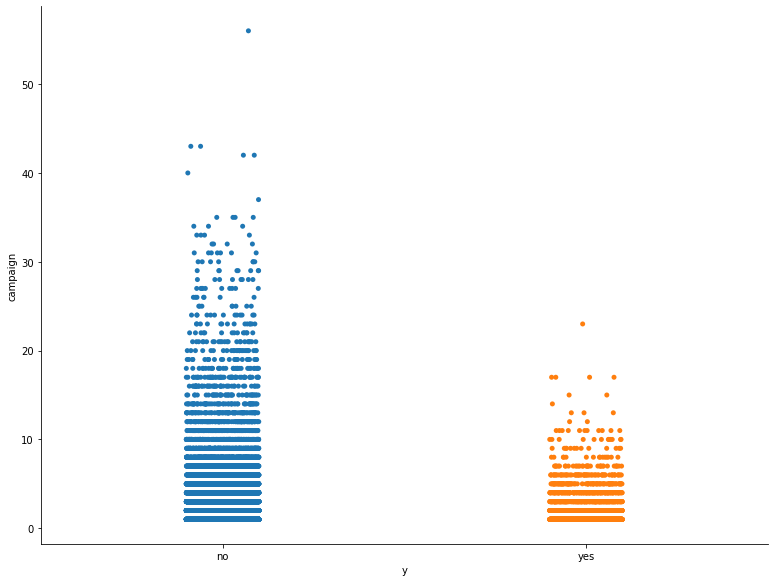

In [64]:
sns.figsize=(15, 5) 
sns.catplot(data=df, x='y', y='campaign', aspect=8/6, height=8);

In [65]:
df[df.y == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,40.902299,551.579502,2.055316,790.203305,0.494732,-1.220690,93.361787,-39.819397,2.131688,5095.297031
std,13.831597,400.507671,1.667744,404.722734,0.863898,1.621333,0.675989,6.101435,1.745427,87.923517
min,17.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,252.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.853250,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.503500,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


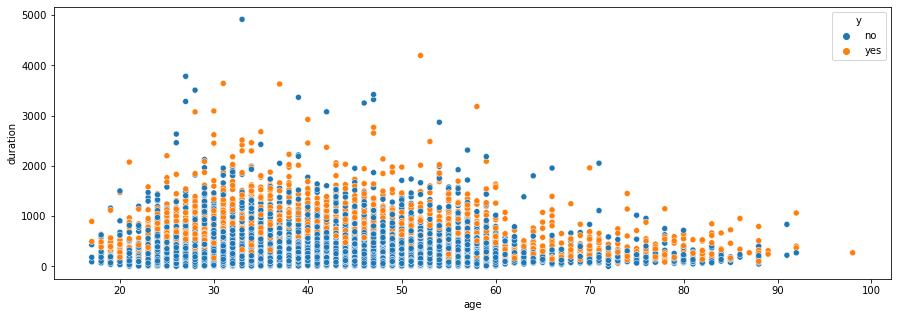

In [66]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

# Modelando

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.externals import joblib
import joblib
from sklearn import metrics

In [68]:
# codificaçãão One-hot (mas não  vamos usar no modelo)
pd.get_dummies(df, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,...,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,...,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,...,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,...,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,single,high.school,no,yes,no,cellular,jul,tue,192,...,0,0,0,0,0,0,1,0,0,0
37065,52,married,professional.course,no,yes,no,cellular,nov,fri,64,...,0,0,0,0,0,0,0,0,1,0
37066,54,married,basic.9y,no,no,yes,cellular,jul,mon,131,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]: # df.dtypes == 'object'
    df[c] = df[c].astype('category')

In [70]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [71]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'object'
    df[c] = df[c].cat.codes

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,...,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,...,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,...,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,...,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,...,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [73]:
y = df.y
X = df.drop('y', axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((31508, 20), (5561, 20), (31508,), (5561,))

In [76]:
# vericando a divisão
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [77]:
# Normalizar os dados
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [78]:
df_norm = pd.DataFrame(X_norm, columns=df.columns.drop('y'))

In [79]:
df_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [80]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred = knn_class.predict(X_test)

In [82]:
sub_knn= pd.read_csv('sample.csv', index_col='id')
sub_knn.y=pd.Series(y_pred)
sub_knn.to_csv('submission_knn.csv')

In [83]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561



# Submetendo pro Kaggle

In [84]:
#aval = pd.read_csv('test.csv', index_col='id')
#Implementar get_dummies
aval = pd.read_csv('train.csv', index_col='id')
#aval=pd.get_dummies(aval, columns=['job'])
#aval=aval.drop('y',axis=1)
aval.drop('y',axis=1,inplace=True)
sub =  pd.read_csv('sample.csv', index_col='id')

In [85]:
#Normalizando o test.csv
aval_test = pd.read_csv('test.csv', index_col='id')
#aval_test=pd.get_dummies(aval_test, columns=['job'])
for c in aval_test.columns[aval_test.dtypes == object]: # df.dtypes == 'object'
    aval_test[c] = aval_test[c].astype('category')
aval_test.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)
#Transforma as categorias em números
for c in aval_test.columns[aval_test.dtypes == 'category']: # df.dtypes == 'object'
    aval_test[c] = aval_test[c].cat.codes
X_aval_test = scaler.fit_transform(aval_test.values)

In [86]:
for c in aval.columns[aval.dtypes == object]: # df.dtypes == 'object'
    aval[c] = aval[c].astype('category')

In [87]:
aval.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [88]:
aval.education

id
0        professional.course
1          university.degree
2                high.school
3                   basic.9y
4                high.school
                ...         
37064            high.school
37065    professional.course
37066               basic.9y
37067      university.degree
37068      university.degree
Name: education, Length: 37069, dtype: category
Categories (7, object): ['illiterate' < 'basic.4y' < 'basic.6y' < 'basic.9y' < 'high.school' < 'professional.course' < 'university.degree']

In [89]:
#Transforma as categorias em números
for c in aval.columns[aval.dtypes == 'category']: # df.dtypes == 'object'
    aval[c] = aval[c].cat.codes

In [90]:
aval.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0


In [91]:
X_aval = scaler.fit_transform(aval.values)

In [92]:
X_aval

array([[0.43209877, 0.90909091, 0.33333333, ..., 0.37656904, 0.95919293,
        1.        ],
       [0.2345679 , 0.45454545, 0.66666667, ..., 0.36820084, 0.79777828,
        0.8778828 ],
       [0.44444444, 0.18181818, 0.66666667, ..., 0.33891213, 0.98118341,
        1.        ],
       ...,
       [0.45679012, 0.09090909, 0.66666667, ..., 0.33891213, 0.98118341,
        1.        ],
       [0.14814815, 0.09090909, 0.66666667, ..., 0.60251046, 0.95896622,
        0.85973535],
       [0.22222222, 0.09090909, 0.66666667, ..., 0.37656904, 0.9809567 ,
        1.        ]])

In [93]:
aval_norm = pd.DataFrame(X_aval, columns=aval.columns)

In [94]:
aval_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [95]:
knn_class2 = KNeighborsClassifier()
knn_class2.fit(X_aval, y)

KNeighborsClassifier()

In [96]:
y_aval = knn_class2.predict(X_aval_test)

In [97]:
y_aval

array([0, 0, 1, ..., 1, 0, 0], dtype=int8)

In [98]:
sub.y = pd.Series(y_aval)

In [99]:
sub.head()

,y
id,
0,0
1,0
2,1
3,0
4,1


In [100]:
sub.to_csv('submission.csv')

# Random Forest

In [101]:
#Visualização do conjunto de treino
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0


In [102]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(StandardScaler(), 
                         RandomForestClassifier(n_estimators=400,n_jobs=-1,min_samples_leaf=50))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', None, 'log2'],
                  'randomforestclassifier__max_depth': [None, 3, 1]}
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [103]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X_aval,y)

Wall time: 4min 41s


In [104]:
%%time
#Ajusta o modelo aos dados de treino
#model_2=clf.fit(X_train,y_train)

Wall time: 0 ns


In [105]:
yp = model.predict(X_aval_test)

In [126]:
yp

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [106]:
#yp_train = model_2.predict(X_test)

In [107]:
sub_rf= pd.read_csv('sample.csv', index_col='id')
#sub_rf.y=pd.Series(yp_train)
#sub_rf.to_csv('submission_rf.csv')
#sub_rf.head()

In [115]:
#vizualização dos dados a serem submetidos
sample=pd.read_csv('sample.csv', index_col='id')
sample.y= pd.Series(yp)
#sample.to_csv("~/submission.csv",index=False)
sample.to_csv('submission_rf2.csv')
sample.head()
#MELHOR MODELO ATE AGORA

,y
id,
0,0
1,1
2,1
3,0
4,1


In [128]:
print(metrics.classification_report(y_aval, yp))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3854
           1       0.23      0.78      0.36       265

    accuracy                           0.82      4119
   macro avg       0.61      0.80      0.63      4119
weighted avg       0.93      0.82      0.86      4119



# Métricas de avaliação

In [117]:
#solution = pd.read_csv('solution.csv').y
#naive = pd.read_csv('allzeros.csv').y
#rf = pd.read_csv('random_forest.csv').y

In [118]:
solution = pd.read_csv('submission_knn.csv').y
naive = pd.read_csv('submission_rf2.csv').y
rf = pd.read_csv('submission_rf2.csv').y

In [119]:
# F1 de cada categoria
metrics.f1_score(solution, naive, pos_label=0), metrics.f1_score(solution, naive, pos_label=1)

(0.83873757025508, 0.13856812933025403)

In [120]:
metrics.f1_score(solution, naive, average=None)

array([0.83873757, 0.13856813])

In [121]:
metrics.f1_score(solution, naive, average='micro'), metrics.f1_score(solution, naive, average='macro')

(0.7283321194464676, 0.488652849792667)

In [122]:
metrics.accuracy_score(solution,naive)

0.7283321194464676

In [123]:
metrics.precision_score(solution, naive, average=None), metrics.recall_score(solution, naive, average=None)

(array([0.90344613, 0.10022272]), array([0.78267886, 0.2244389 ]))

In [124]:
metrics.precision_recall_fscore_support(solution, naive)

(array([0.90344613, 0.10022272]),
 array([0.78267886, 0.2244389 ]),
 array([0.83873757, 0.13856813]),
 array([3718,  401], dtype=int64))

In [125]:
print(metrics.classification_report(solution, rf))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3718
           1       0.10      0.22      0.14       401

    accuracy                           0.73      4119
   macro avg       0.50      0.50      0.49      4119
weighted avg       0.83      0.73      0.77      4119

